In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\khan.shadaab\OneDrive - Interpublic\Downloads\customer_churn_dataset.csv")
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [3]:
df.isnull().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [4]:
df.dtypes

customer_id           int64
tenure                int64
monthly_charges     float64
total_charges       float64
contract             object
payment_method       object
internet_service     object
tech_support         object
online_security      object
support_calls         int64
churn                object
dtype: object

In [5]:
#percentage of each column missing 
df.isnull().mean()*100

customer_id          0.000
tenure               0.000
monthly_charges      0.000
total_charges        0.000
contract             0.000
payment_method       0.000
internet_service    10.065
tech_support         0.000
online_security      0.000
support_calls        0.000
churn                0.000
dtype: float64

In [6]:
(df.isnull().mean()*100).sort_values(ascending=False)

internet_service    10.065
tenure               0.000
customer_id          0.000
monthly_charges      0.000
total_charges        0.000
contract             0.000
payment_method       0.000
tech_support         0.000
online_security      0.000
support_calls        0.000
churn                0.000
dtype: float64

In [7]:
#checing rows with missing data

df[df.isnull().any(axis=1)]

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
11,12,38,49.50,1881.00,Month-to-month,Debit,NaN,No,Yes,1,Yes
32,33,51,90.90,4635.90,Month-to-month,Credit,NaN,No,No,6,Yes
45,46,44,74.24,3266.56,Two year,Cash,NaN,No,No,1,No
57,58,63,103.03,6490.89,Month-to-month,UPI,NaN,No,No,1,Yes
67,68,40,63.91,2556.40,Month-to-month,UPI,NaN,Yes,No,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19907,19908,45,73.63,3313.35,Month-to-month,Credit,NaN,Yes,No,0,No
19926,19927,16,40.49,647.84,Month-to-month,Debit,NaN,No,No,1,No
19930,19931,2,106.89,213.78,Two year,Debit,NaN,No,Yes,1,Yes
19941,19942,27,46.30,1250.10,Two year,Credit,NaN,No,No,1,No


In [8]:
df.isnull().any(axis=1).mean() * 100


np.float64(10.065)

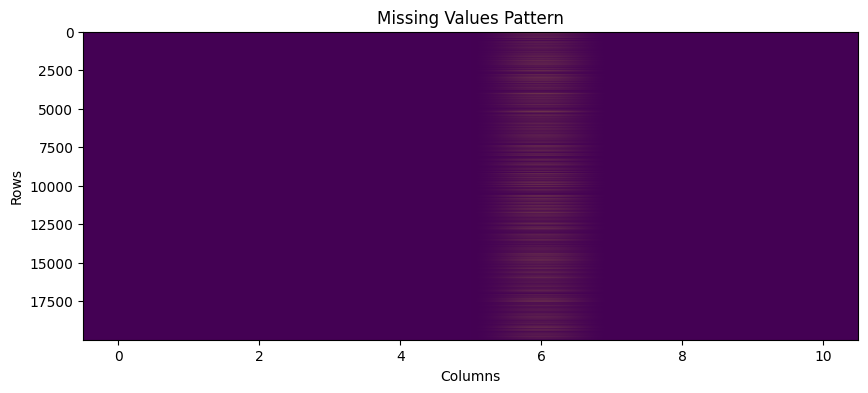

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.imshow(df.isnull(), aspect='auto')
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Missing Values Pattern")
plt.show()


In [10]:
df["internet_service"].describe()

count     17987
unique        2
top       Fiber
freq      10064
Name: internet_service, dtype: object

In [11]:
df["col_missing_flags"] = df["internet_service"].isnull().astype(int)

In [12]:
df["col_missing_flags"]

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: col_missing_flags, Length: 20000, dtype: int64

In [13]:
#dropping customer_id column as it is of no use
df = df.drop(columns=["customer_id"])

In [14]:
df

,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,col_missing_flags
0,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No,0
1,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No,0
2,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No,0
3,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No,0
4,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,36,69.51,2502.36,Two year,Cash,DSL,No,Yes,0,Yes,0
19996,10,59.88,598.80,Month-to-month,UPI,Fiber,Yes,No,1,No,0
19997,6,42.96,257.76,Month-to-month,Credit,Fiber,No,No,2,No,0
19998,7,102.85,719.95,Month-to-month,Debit,DSL,Yes,No,2,No,0


In [17]:
#train_test_split
X = df.drop(columns=["churn"])
y = df["churn"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [19]:
#organizing features according to their data type
num_columns = ["tenure","monthly_charges","total_charges","support_calls"]
binary_columns = ["tech_support","online_security"]
ordinal_columns = ["contract"]
nominal_columns = ["payment_method","internet_service"]

In [20]:
#Using column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [21]:
#applied transformer 
preprocessor = ColumnTransformer(transformers=[
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]),num_columns),

    ("bin",OrdinalEncoder(categories=[["No","Yes"],["No","Yes"]]),binary_columns),
    ("ordin",OrdinalEncoder(categories=[
        ["Month-to-month","One year","Two year"]
    ]),ordinal_columns),
    ("nom",Pipeline([
        ("imputer",SimpleImputer(strategy="constant",fill_value="Unknown")),
        ("onehot",OneHotEncoder(drop="first",handle_unknown="ignore"))
    ]),nominal_columns)
]
     
    )


In [22]:
df["contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [23]:
#importing logistic and Grid Search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [24]:
pipe = Pipeline(
    steps=[("preprocessor",preprocessor),
          ("classifier",LogisticRegression())
          ]
    
)

In [25]:
param_grid = {
    "classifier__C":[0.01,0.1,1,10],
    "classifier__penalty":["l1","l2"],
    "classifier__solver":["liblinear"],
    "preprocessor__num__imputer__strategy":["mean","median"],
    "preprocessor__nom__imputer__strategy":["most_frequent","constant"]
    
}

In [26]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train,y_train)

C:\Users\khan.shadaab\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\khan.shadaab\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear'], 'preprocessor__nom__imputer__strategy': ['most_frequent', 'constant'], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the mo

In [27]:
model = grid.best_estimator_


In [28]:
print("Best params",grid.best_params_)
print("Best CV ROC-AUC:",grid.best_score_)

Best params {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessor__nom__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'median'}
Best CV ROC-AUC: 0.7752716357995131


In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,r2_score,classification_report

In [31]:
accuracy_score(y_test,y_pred)


0.77375

In [58]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n          No       0.78      0.91      0.84      2660\n         Yes       0.74      0.50      0.60      1340\n\n    accuracy                           0.77      4000\n   macro avg       0.76      0.71      0.72      4000\nweighted avg       0.77      0.77      0.76      4000\n'

In [82]:
#check if the model is overfitted or underfitted
grid.best_estimator_.score(X_train,y_train)
grid.best_estimator_.score(X_test,y_test)

0.7745

In [83]:
#calculationg roc-auc
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_prob)

0.7738483335203681

In [84]:
#checking with polynomial
from sklearn.preprocessing import PolynomialFeatures

In [106]:
#Adding polynomial on numeric data
preprocessor = ColumnTransformer(transformers=[
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
        ("poly",PolynomialFeatures(degree=2))
        
    ]),num_columns),

    ("bin",OrdinalEncoder(categories=[["No","Yes"],["No","Yes"]]),binary_columns),
    ("ordin",OrdinalEncoder(categories=[
        ["Month-to-month","One year","Two year"]
    ]),ordinal_columns),
    ("nom",Pipeline([
        ("imputer",SimpleImputer(strategy="constant",fill_value="Unknown")),
        ("onehot",OneHotEncoder(drop="first",handle_unknown="ignore"))
    ]),nominal_columns)
]
     
    )


In [107]:
pipe = Pipeline(
    steps=[("preprocessor",preprocessor),
          ("classifier",LogisticRegression())
          ]
    
)

In [108]:
param_grid = {
    "classifier__C":[0.01,0.1,1,10],
    "classifier__penalty":["l1","l2"],
    "classifier__solver":["liblinear"],
    "preprocessor__num__imputer__strategy":["mean","median"],
    "preprocessor__nom__imputer__strategy":["most_frequent","constant"]
    
}

In [109]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=2,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train,y_train)

C:\Users\khan.shadaab\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\khan.shadaab\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear'], 'preprocessor__nom__imputer__strategy': ['most_frequent', 'constant'], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",2
,"verbose verbose: intControls the verbosity: the higher, the mo

In [110]:
print("Best params",grid.best_params_)
print("Best CV ROC-AUC:",grid.best_score_)

Best params {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessor__nom__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'median'}
Best CV ROC-AUC: 0.7817725255644585


In [111]:
model2 = grid.best_estimator_


In [112]:
print("Best params",grid.best_params_)
print("Best CV ROC-AUC:",grid.best_score_)

Best params {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessor__nom__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'median'}
Best CV ROC-AUC: 0.7817725255644585


In [113]:
y_pred3 = model2.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred3)


0.77875

In [96]:
#using polynomial at degree 3 accuracy has been increasd by 4%
old = classification_report(y_test,y_pred)
new = classification_report(y_test,y_pred3)
print(old)
print(new)

              precision    recall  f1-score   support

          No       0.78      0.91      0.84      2660
         Yes       0.74      0.50      0.60      1340

    accuracy                           0.77      4000
   macro avg       0.76      0.71      0.72      4000
weighted avg       0.77      0.77      0.76      4000

              precision    recall  f1-score   support

          No       0.79      0.91      0.84      2660
         Yes       0.74      0.51      0.60      1340

    accuracy                           0.77      4000
   macro avg       0.76      0.71      0.72      4000
weighted avg       0.77      0.77      0.76      4000



In [97]:
#checking roc also
y_prob2 = grid.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_prob2)

0.7736101447648973

In [98]:
#adding random forest in pipeline
from sklearn.ensemble import RandomForestClassifier
pipe2 = Pipeline(
    steps = [("preprocessor",preprocessor),
            ("rfc",RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1))
            ]
    
)

In [99]:
param_grid_rfc = {
    "rfc__n_estimators":[200,400],
    "rfc__max_depth":[None,10,20],
    "rfc__min_samples_split":[2,5],
    "rfc__max_features":["sqrt","log2"]
   }

In [100]:
grid2 = GridSearchCV(
    pipe2,
    param_grid_rfc,
    cv=2,
    scoring="roc_auc",
    n_jobs=-1
    
    
)
grid2.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'rfc__max_depth': [None, 10, ...], 'rfc__max_features': ['sqrt', 'log2'], 'rfc__min_samples_split': [2, 5], 'rfc__n_estimators': [200, 400]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",2
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for 

In [101]:
print("Best params",grid2.best_params_)
print("Best CV ROC-AUC:",grid2.best_score_)

Best params {'rfc__max_depth': 10, 'rfc__max_features': 'sqrt', 'rfc__min_samples_split': 2, 'rfc__n_estimators': 200}
Best CV ROC-AUC: 0.8113607385996886


In [102]:
model3 = grid2.best_estimator_

In [103]:
y_pred3 = model3.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred3)

0.846

In [105]:
grid2.best_score_

np.float64(0.8113607385996886)

In [ ]:
| Model               | Accuracy | ROC-AUC |
| ------------------- | -------- | ------- |
| Logistic Regression | ~77%     | ~0.77   |
| Random Forest       | ~84%     | ~0.81   |
